<a href="https://colab.research.google.com/github/donnysdp/tugaspython_imageclassification_daun/blob/main/Tugas_Python_Image_Classification_DAUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

 dataset@  'Tugas Python - Image Classification DAUN.ipynb'


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1055, 64, 64, 3)
(352, 64, 64, 3)


In [11]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(12, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1

In [12]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
33/33 [==============================] - 2s 72ms/step - loss: 2.4810 - accuracy: 0.1232 - val_loss: 2.4002 - val_accuracy: 0.1761
Epoch 2/25
33/33 [==============================] - 2s 68ms/step - loss: 2.2875 - accuracy: 0.2408 - val_loss: 2.2000 - val_accuracy: 0.2472
Epoch 3/25
33/33 [==============================] - 2s 68ms/step - loss: 2.0256 - accuracy: 0.2910 - val_loss: 2.0348 - val_accuracy: 0.3040
Epoch 4/25
33/33 [==============================] - 2s 68ms/step - loss: 1.7806 - accuracy: 0.3972 - val_loss: 1.7891 - val_accuracy: 0.4034
Epoch 5/25
33/33 [==============================] - 2s 69ms/step - loss: 1.5680 - accuracy: 0.4701 - val_loss: 1.6893 - val_accuracy: 0.4432
Epoch 6/25
33/33 [==============================] - 2s 69ms/step - loss: 1.4621 - accuracy: 0.4787 - val_loss: 1.7860 - val_accuracy: 0.4006
Epoch 7/25
33/33 [==============================] - 2s 69ms/step - loss: 1.3367 - accuracy: 0.5536 - val_loss: 1.5674 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


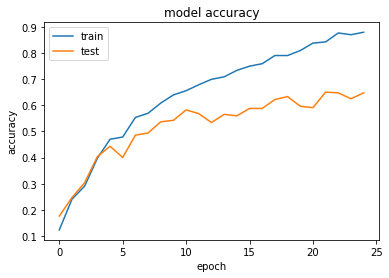

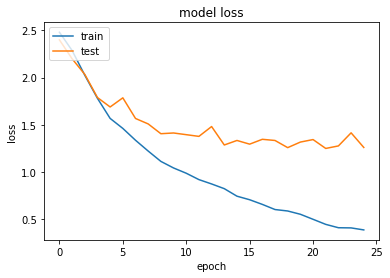

In [13]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.68      0.50      0.58        34
      GMB_02       0.63      0.74      0.68        23
      GMB_03       0.54      0.79      0.64        19
      GMB_04       0.59      0.50      0.54        32
      GMB_05       0.79      0.71      0.75        31
      GMB_06       0.71      0.44      0.54        39
      GMB_07       0.41      0.46      0.43        28
      GMB_08       0.62      0.83      0.71        30
      GMB_09       0.81      0.94      0.87        32
      GMB_10       0.70      0.68      0.69        28
      GMB_11       0.48      0.43      0.46        30
      nonGMB       0.80      0.92      0.86        26

    accuracy                           0.65       352
   macro avg       0.65      0.66      0.65       352
weighted avg       0.65      0.65      0.64       352



In [16]:
model1.save('nnmodel_dataset')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_dataset/assets


In [27]:
import cv2
import matplotlib.pyplot as plt
image1='/content/drive/MyDrive/Colab Notebooks/dataset/GMB_07/IMG_20200814_120715_HDR.jpg'

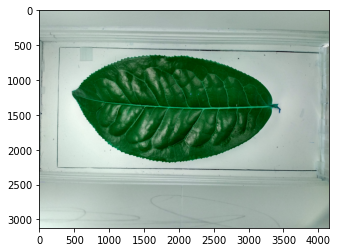

In [28]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array)

In [29]:
image_testing = Image.open('/content/drive/MyDrive/Colab Notebooks/dataset/GMB_07/IMG_20200814_120715_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [30]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [31]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[3.8133692e-03 1.9657004e-05 2.4402198e-06 1.5037823e-03 4.3799955e-04
  1.1252395e-03 7.1380429e-02 1.1059581e-06 4.9506151e-03 1.7860867e-01
  7.3691040e-01 1.2462644e-03]]
['GMB_11']
